In [ ]:
# Install: pip install git+https://github.com/seokhyung-lee/color-code-stim.git@sdqc

In [70]:
from color_code_stim import ColorCode, NoiseModel

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Space multiplexing circuit

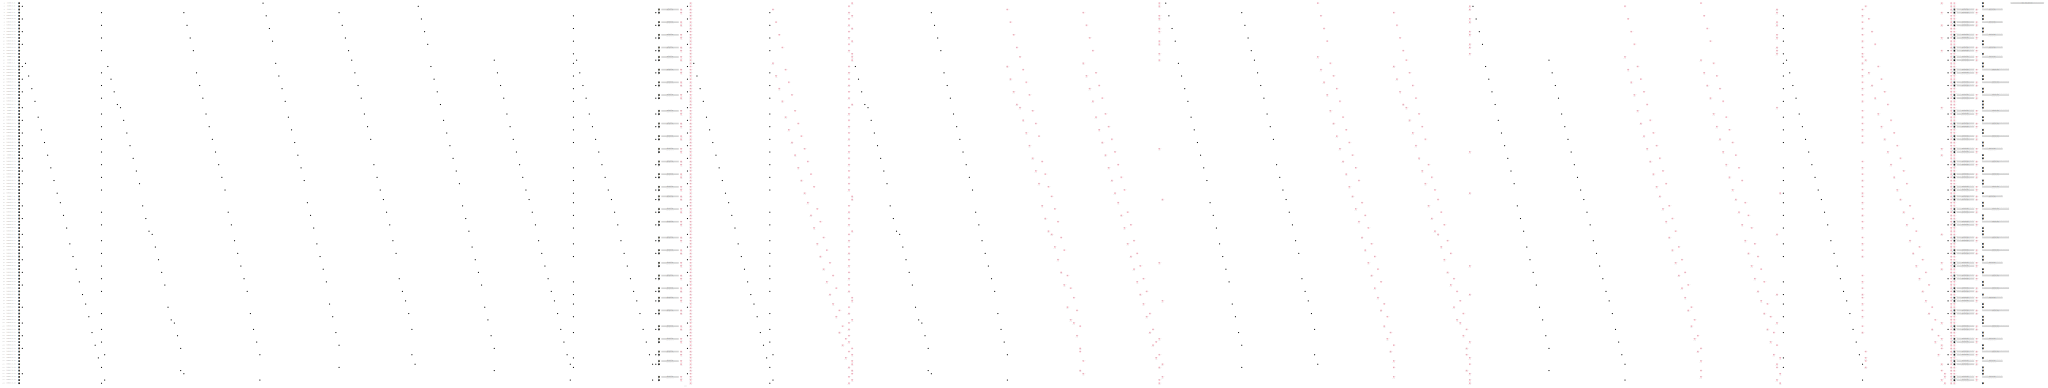

In [93]:
noise = NoiseModel(
    reset_anc_X=1e-3,  # reset flip error on X-type anc qubit
    reset_anc_Z=1e-3,  # reset flip error on Z-type anc qubit
    meas_anc_X=1e-3,  # measurement flip error on X-type anc qubit
    meas_anc_Z=1e-3,  # measurement flip error on Z-type anc qubit
    cnot=1e-3,  # depol2 after CNOT
    depol1_after_cnot=1e-3,  # depol1 on each qubit after CNOT
    idle_during_cnot=1e-3,  # depol1 on idling qubits during CNOT
    idle_during_meas=0,  # depol1 on idling qubits during measurement
    initial_data_qubit_depol=1e-3,  # depol on data qubits after initial syndrome extraction
    depol1_on_anc_before_cnot=1e-3,  # depol on ancilla qubits before CNOT during syndrome extraction
)

noise = NoiseModel.uniform_circuit_noise(1e-3)

cc = ColorCode(
    d=9,
    rounds=10,  # T + 1
    circuit_type="tri",
    noise_model=noise,
    temp_bdry_type="z",
    perfect_logical_initialization=True,
    perfect_logical_measurement=True,
    perfect_first_syndrome_extraction=True,
)

cc.circuit.diagram("timeline-svg")

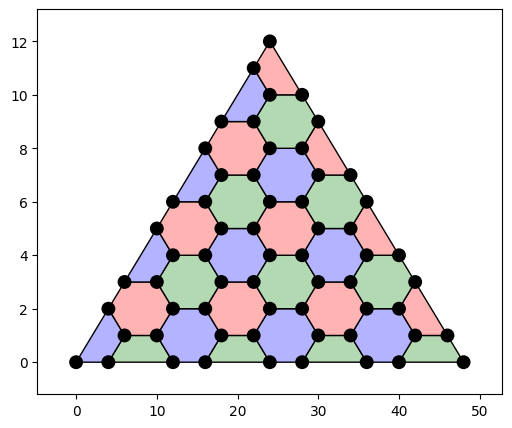

In [72]:
ax = cc.draw_lattice(show_axes=True)

## Superdense circuit

In [97]:
noise = NoiseModel(
    reset_anc_X=1e-3,  # reset flip error on X-type anc qubit
    reset_anc_Z=1e-3,  # reset flip error on Z-type anc qubit
    meas_anc_X=1e-3,  # measurement flip error on X-type anc qubit
    meas_anc_Z=1e-3,  # measurement flip error on Z-type anc qubit
    cnot=1e-3,  # depol2 after CNOT
    depol1_after_cnot=1e-3,  # depol1 on each qubit after CNOT (excluding Bell preparation)
    idle_during_cnot=1e-3,  # depol1 on idling qubits during CNOT (excluding Bell prep/meas CNOT)
    idle_during_meas=0,  # depol1 on idling qubits during measurement
    initial_data_qubit_depol=1e-3,  # depol on data qubits after initial syndrome extraction
    shuttling_non_seg_init=1e-3,
    shuttling_seg_init=1e-3,
    shuttling_non_seg_final=1e-3,
    shuttling_seg_final=1e-3,
    depol1_on_anc_before_cnot=1e-3,
)

cc = ColorCode(
    d=13,
    rounds=14,  # d + 1
    circuit_type="sdqc_memory",
    noise_model=noise,
    temp_bdry_type="z",
    set_all_faces_segmented=False,  # QCCD superdense
    superdense_circuit=True,
    perfect_logical_initialization=True,
    perfect_logical_measurement=True,
    perfect_first_syndrome_extraction=True,
)

In [88]:
cc.circuit.diagram("timeline-svg")

<Axes: >

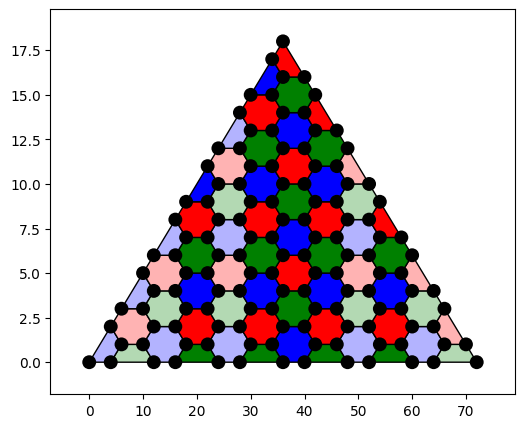

In [89]:
cc.draw_lattice(show_axes=True, highlight_segmented_faces=True)

In [95]:
from statsmodels.stats.proportion import proportion_confint

p_low, p_upp = proportion_confint(3, 10000, method="wilson", alpha=0.05)

p = (p_low + p_upp) / 2
delta_p = p_upp - p
print(p, delta_p)

0.0004918839858270949 0.0003898517864092848


In [98]:
%timeit cc.simulate(1000)

438 ms ± 7.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
